In [1]:
# !pip install openpyxl
# !pip install seaborn
# !pip install wordcloud
# !pip install nltk

## Import the dataset to Pandas dataframe

In [2]:
# Import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import nltk
from scipy.stats import pearsonr
from nltk.corpus import stopwords

In [3]:
# Set the path to our file
file_path = 'Resources/Recruitment Exercise - data - 230102.xlsx'

# Load the Excel file into a pandas DataFrame
emp_eng_df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
emp_eng_df.head()

,ID,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q3,Q4,Q5
0,1,4,2,1,2,5,5,5,Resolve internal conflicts. Figure out why peo...,2,1
1,2,4,4,4,4,4,5,4,Flexible part-time working arrangements.,2,1
2,3,3,4,1,1,4,4,4,Focus on core LG requirements and the staff. F...,2,1
3,4,2,2,4,2,5,5,5,Retaining good people. We are losing them fast...,2,1
4,5,5,5,5,5,4,5,5,Provide flexibility to employees who need it t...,2,2


## Data manipulation and exploration

In [4]:
# Review the structure of the dataset
# Check for missing values, data types, number of columns and rows
emp_eng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      30 non-null     int64 
 1   Q1      30 non-null     int64 
 2   Q2_1    30 non-null     int64 
 3   Q2_2    30 non-null     int64 
 4   Q2_3    30 non-null     int64 
 5   Q2_4    30 non-null     int64 
 6   Q2_5    30 non-null     int64 
 7   Q2_6    30 non-null     int64 
 8   Q3      30 non-null     object
 9   Q4      30 non-null     int64 
 10  Q5      30 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 2.7+ KB


In [5]:
# Retrieve summary statistics 
emp_eng_df.describe()

,ID,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q4,Q5
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,3.633333,6.833333,6.566667,2.900000,3.866667,7.366667,3.666667,5.000000,7.666667
std,8.803408,0.764890,17.266838,17.492231,1.241523,0.937102,17.325451,1.093345,17.758922,24.829534
min,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000
25%,8.250000,3.000000,2.500000,3.000000,2.000000,4.000000,4.000000,3.000000,2.000000,1.000000
50%,15.500000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000,1.000000
75%,22.750000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,2.000000,1.000000
max,30.000000,5.000000,98.000000,99.000000,5.000000,5.000000,99.000000,5.000000,99.000000,99.000000


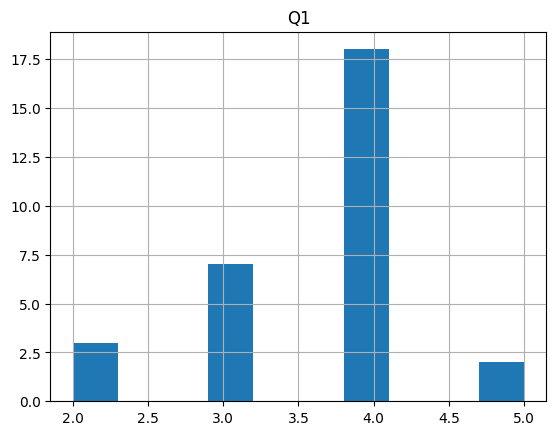

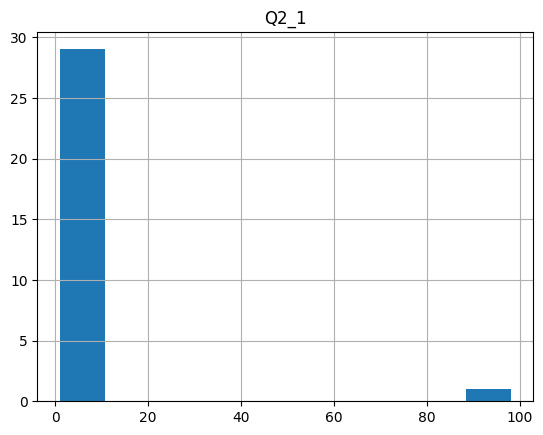

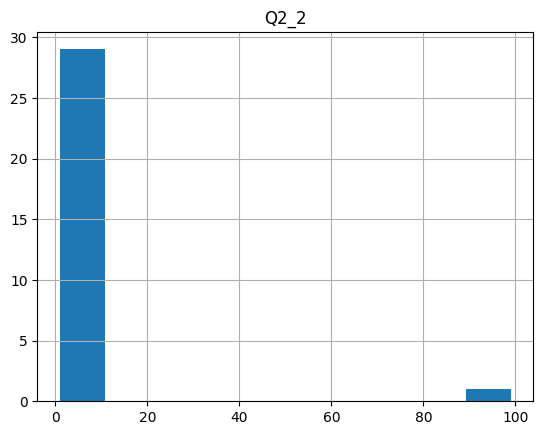

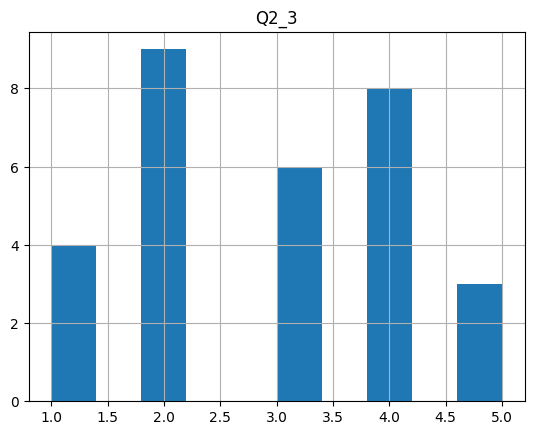

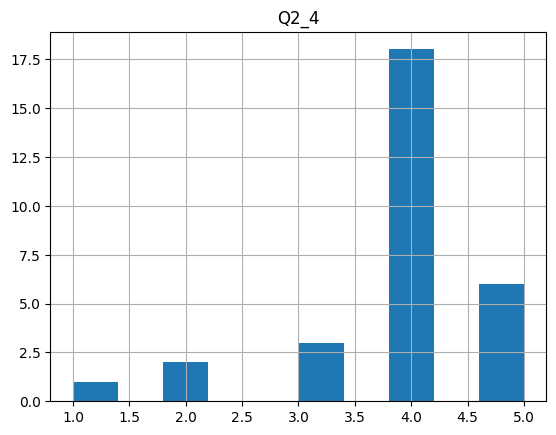

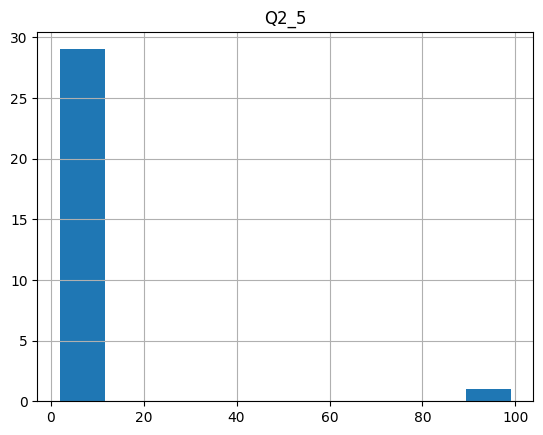

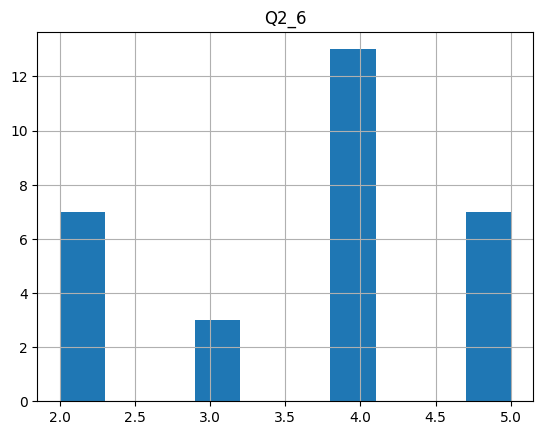

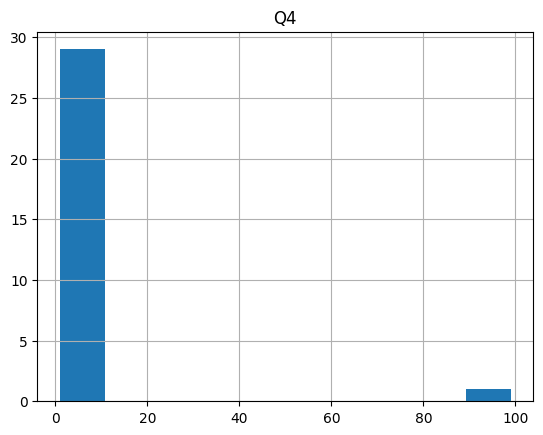

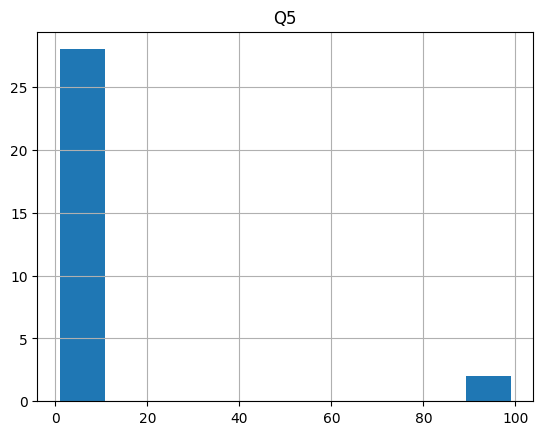

In [6]:
# Visualise the distribution of each question using a histogram
# Create a function to create a histogram for all integer columns
def create_histogram(column):
            emp_eng_df[column].hist()
            plt.title(column)
            plt.show()
            
# Create a list of column names
columns = emp_eng_df.columns.to_list()

# Create a for-loop to plot a histogram for each column
for column in columns:
    if emp_eng_df[column].dtype == int and column != 'ID': #excluding ID column
        create_histogram(column)

**Findings**: Questions 2_1, 2_2, 2_5, 4, and 5 contain extreme values (98 and/or 99), which have the potential to distort the data. It is important we address this issue before proceeding with data analysis to ensure the integrity and reliability of the results.

### Exploring different replacement methods

In [7]:
#Create copies of the original dataset to avoid altering the original data
emp_eng_df_copy1 =  emp_eng_df.copy()
emp_eng_df_copy2 =  emp_eng_df.copy()

# Method 1: replace 99 and 98 with 0 
emp_eng_df_copy1.replace({98: 0, 99: 0}, inplace=True)
emp_eng_df_copy1

,ID,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q3,Q4,Q5
0,1,4,2,1,2,5,5,5,Resolve internal conflicts. Figure out why peo...,2,1
1,2,4,4,4,4,4,5,4,Flexible part-time working arrangements.,2,1
2,3,3,4,1,1,4,4,4,Focus on core LG requirements and the staff. F...,2,1
3,4,2,2,4,2,5,5,5,Retaining good people. We are losing them fast...,2,1
4,5,5,5,5,5,4,5,5,Provide flexibility to employees who need it t...,2,2
5,6,3,4,4,2,4,4,4,Staff Retention Strategies\nMore internal focu...,1,1
6,7,3,2,2,2,2,4,2,Middle management professional development and...,1,1
7,8,4,5,4,4,4,4,4,Equalise pay structure/ increases with outside...,2,1
8,9,3,2,2,2,3,2,2,"Employment, and fixing IT issues",2,1
9,10,4,4,4,1,4,4,4,"Focus on transparency within the organisation,...",2,2


In [8]:
# Method 2: replace 99 and 98 with the median of the respective column
# Replace 98 and 99 with NaN temporarily
emp_eng_df_copy2 = emp_eng_df_copy2.drop(columns=['Q3'])
emp_eng_df_copy2.replace({98: np.nan, 99: np.nan}, inplace=True)

# Calculate the median of each column
medians = emp_eng_df_copy2.median()

# Replace NaN values with the corresponding median in each column
emp_eng_df_copy2.fillna(medians, inplace=True)
emp_eng_df_copy2 # Check dataframe

,ID,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q4,Q5
0,1,4,2.0,1.0,2,5,5.0,5,2.0,1.0
1,2,4,4.0,4.0,4,4,5.0,4,2.0,1.0
2,3,3,4.0,1.0,1,4,4.0,4,2.0,1.0
3,4,2,2.0,4.0,2,5,5.0,5,2.0,1.0
4,5,5,5.0,5.0,5,4,5.0,5,2.0,2.0
5,6,3,4.0,4.0,2,4,4.0,4,1.0,1.0
6,7,3,2.0,2.0,2,2,4.0,2,1.0,1.0
7,8,4,5.0,4.0,4,4,4.0,4,2.0,1.0
8,9,3,2.0,2.0,2,3,2.0,2,2.0,1.0
9,10,4,4.0,4.0,1,4,4.0,4,2.0,2.0


In [9]:
emp_eng_df_copy1.describe()

,ID,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q4,Q5
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,3.633333,3.566667,3.266667,2.900000,3.866667,4.066667,3.666667,1.700000,1.066667
std,8.803408,0.764890,1.454679,1.257620,1.241523,0.937102,1.112107,1.093345,0.534983,0.449776
min,1.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000
25%,8.250000,3.000000,2.000000,3.000000,2.000000,4.000000,4.000000,3.000000,1.250000,1.000000
50%,15.500000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000,1.000000
75%,22.750000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,2.000000,1.000000
max,30.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,2.000000


In [10]:
emp_eng_df_copy2.describe()

,ID,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q4,Q5
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,3.633333,3.700000,3.400000,2.900000,3.866667,4.200000,3.666667,1.766667,1.133333
std,8.803408,0.764890,1.290549,1.101723,1.241523,0.937102,0.805156,1.093345,0.430183,0.345746
min,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000
25%,8.250000,3.000000,2.500000,3.000000,2.000000,4.000000,4.000000,3.000000,2.000000,1.000000
50%,15.500000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000,1.000000
75%,22.750000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,2.000000,1.000000
max,30.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,2.000000


**Decision:** Given that responses marked as 98 and 99 signify Uncertain/Not Applicable responses, I propose adopting Method #1 to treat them as a distinct category (coded as 0). This approach enhances the efficiency of aggregation and statistical analysis. While Method #2 has successfully addressed extreme values, it has concurrently inflated our means. In the context of assessing employee engagement, this outcome is undesirable, as it deviates from our objective of obtaining the most accurate representation of employees' responses without significant distortion.

In [11]:
# Using emp_eng_df_copy1, replace values 1 and 2 in column Q4 with management and non-management
# for the purpose of grouping and data aggregation
emp_eng_df_copy1['Q4'].replace({1:'management', 2:'non-management', 0:'unsure'}, inplace=True)

# Using emp_eng_df_copy1, replace values 1, 2 and 0 in column Q5 with full-time, part-time and unsure
emp_eng_df_copy1['Q5'].replace({1:'full-time', 2:'part-time', 0:'unsure'}, inplace=True)
emp_eng_df_copy1 # Check dataframe

,ID,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q3,Q4,Q5
0,1,4,2,1,2,5,5,5,Resolve internal conflicts. Figure out why peo...,non-management,full-time
1,2,4,4,4,4,4,5,4,Flexible part-time working arrangements.,non-management,full-time
2,3,3,4,1,1,4,4,4,Focus on core LG requirements and the staff. F...,non-management,full-time
3,4,2,2,4,2,5,5,5,Retaining good people. We are losing them fast...,non-management,full-time
4,5,5,5,5,5,4,5,5,Provide flexibility to employees who need it t...,non-management,part-time
5,6,3,4,4,2,4,4,4,Staff Retention Strategies\nMore internal focu...,management,full-time
6,7,3,2,2,2,2,4,2,Middle management professional development and...,management,full-time
7,8,4,5,4,4,4,4,4,Equalise pay structure/ increases with outside...,non-management,full-time
8,9,3,2,2,2,3,2,2,"Employment, and fixing IT issues",non-management,full-time
9,10,4,4,4,1,4,4,4,"Focus on transparency within the organisation,...",non-management,part-time


In [12]:
emp_eng_df_copy1.columns

Index(['ID', 'Q1', 'Q2_1', 'Q2_2', 'Q2_3', 'Q2_4', 'Q2_5', 'Q2_6', 'Q3', 'Q4',
       'Q5'],
      dtype='object')

In [13]:
# Exclude the ID and Q3 columns for now for analysis 
selected_cols = ['Q1', 'Q2_1', 'Q2_2', 'Q2_3', 'Q2_4', 'Q2_5', 'Q2_6','Q4','Q5']
emp_eng_df_copy1 = emp_eng_df_copy1[selected_cols]
emp_eng_df_copy1

,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q4,Q5
0,4,2,1,2,5,5,5,non-management,full-time
1,4,4,4,4,4,5,4,non-management,full-time
2,3,4,1,1,4,4,4,non-management,full-time
3,2,2,4,2,5,5,5,non-management,full-time
4,5,5,5,5,4,5,5,non-management,part-time
5,3,4,4,2,4,4,4,management,full-time
6,3,2,2,2,2,4,2,management,full-time
7,4,5,4,4,4,4,4,non-management,full-time
8,3,2,2,2,3,2,2,non-management,full-time
9,4,4,4,1,4,4,4,non-management,part-time


In [51]:
# Average scores for questions 1 - 2.6
cal_cols = emp_eng_df_copy1.columns.to_list()

means_list = []
for col in cal_cols:
    if emp_eng_df_copy1[col].dtype == int: # select integer columns
        mean = round(emp_eng_df_copy1[col].mean(), 2) # round mean to 2 d.p
        means_list.append(mean) # append mean to means_list
means_list

# Create a new dataframe with the calculated means
question_means = pd.DataFrame(columns=[col for col in cal_cols if emp_eng_df_copy1[col].dtype == int])
question_means

# Assign values from the list to the first row of the DataFrame
question_means.loc[0] = [3.63, 3.57, 3.27, 2.9, 3.87, 4.07, 3.67]
question_means

,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6
0,3.63,3.57,3.27,2.9,3.87,4.07,3.67


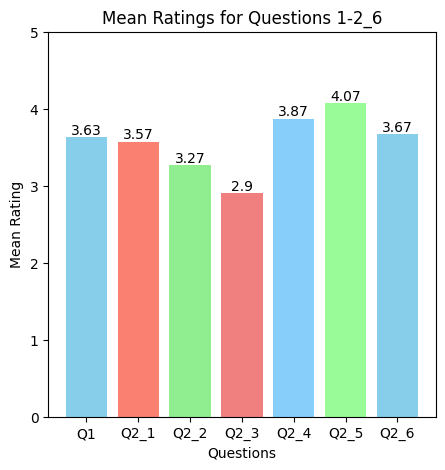

In [77]:
# Plot mean ratings for questions 1 - 2.6
bar_colors = ['skyblue', 'salmon', 'lightgreen', 'lightcoral', 'lightskyblue', 'palegreen']

plt.figure(figsize=(5, 5))
bars =  plt.bar(question_means.columns, question_means.loc[0], color=bar_colors)
plt.title('Mean Ratings for Questions 1-2_6')
plt.xlabel('Questions')
plt.ylabel('Mean Rating')
plt.ylim(0, 5) 

# Add data labels
for bar in bars:
    # Get the height (mean) of the current bar and round it to 2 decimal places
    yval = round(bar.get_height(), 2)

    # Add a text label at the center of the bar, vertically aligned to the bottom
    plt.text(bar.get_x()+ bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

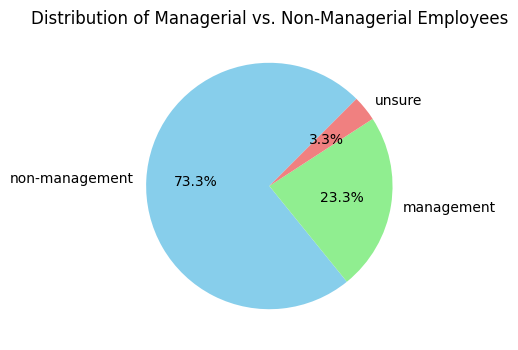

In [16]:
# Extract the counts and labels from the value_counts result
counts = emp_eng_df_copy1['Q4'].value_counts()
labels = counts.index # set the the indices of our Series to labels of our pie chart

# Plot the pie chart
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=45, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Managerial vs. Non-Managerial Employees')
plt.show()

**Finding:** There're more non-managerial employees in our sample.

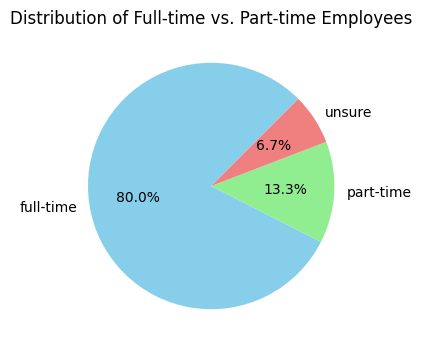

In [17]:
# Check numbers of full-time vs. part-time employees
counts = emp_eng_df_copy1['Q5'].value_counts()
labels = counts.index # set the the indices of our Series to labels of our pie chart

# Plot the pie chart
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=45, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Full-time vs. Part-time Employees')
plt.show()

**Finding:** There're more full-time employees than part-time employees in our sample.

## Data visualisation & analysis

### Management groups

In [18]:
# Group by Q4 (management vs. non-management) and find the means of questions 1 - 2.6
selected_cols = ['Q1', 'Q2_1', 'Q2_2', 'Q2_3', 'Q2_4', 'Q2_5', 'Q2_6']
management_grouped =  emp_eng_df_copy1.groupby('Q4')[selected_cols].mean()
management_grouped

,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6
Q4,,,,,,,
management,3.857143,3.571429,3.571429,3.571429,4.142857,4.571429,4.142857
non-management,3.590909,3.545455,3.318182,2.772727,3.772727,3.909091,3.590909
unsure,3.000000,4.000000,0.000000,1.000000,4.000000,4.000000,2.000000


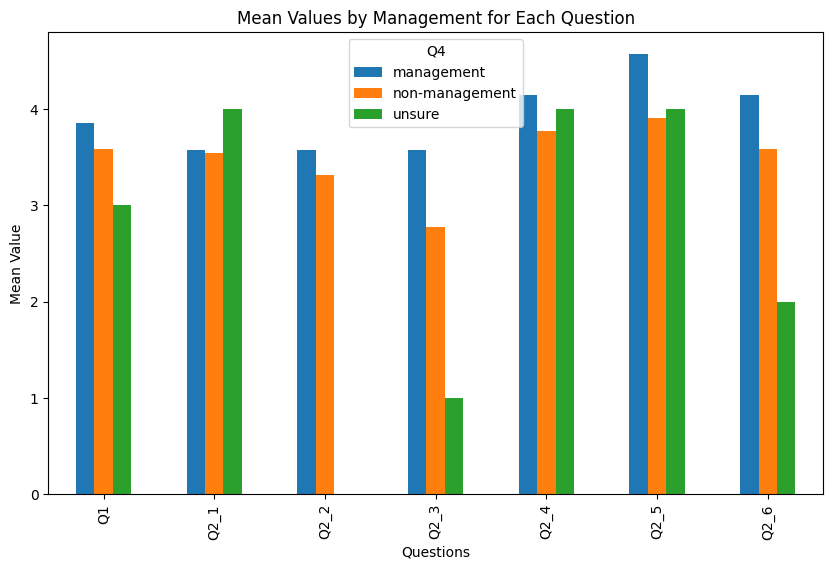

In [19]:
# Bar Chart to visualise the groupby results
management_grouped.T.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Values by Management for Each Question')
plt.xlabel('Questions')
plt.ylabel('Mean Value')
plt.show()

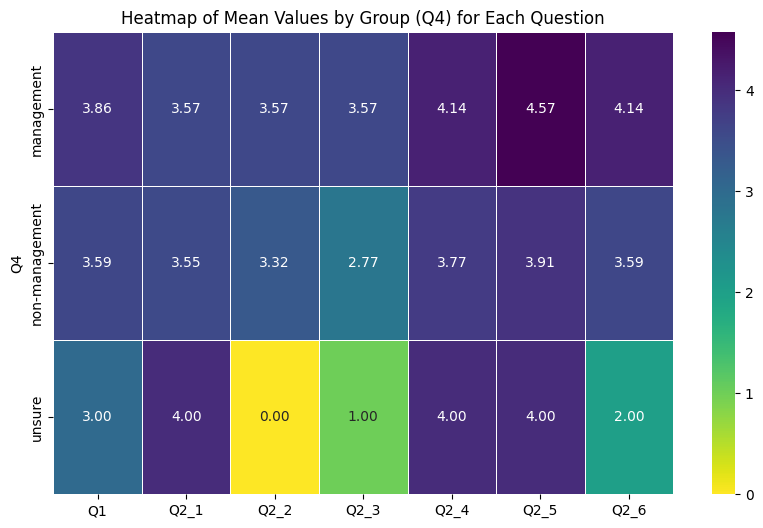

In [20]:
# Heatmap for management_grouped
plt.figure(figsize=(10, 6))

# Explicitly reverse the 'viridis' color map
cmap_reversed = sns.color_palette("viridis", as_cmap=True)
cmap_reversed = cmap_reversed.reversed()

sns.heatmap(management_grouped, cmap=cmap_reversed, annot=True, fmt='.2f', linewidths=.5)

plt.title('Heatmap of Mean Values by Group (Q4) for Each Question')
plt.show()

**Findings:** There is a noticeable disparity in perspectives between managerial and non-managerial employees concerning the organizational aspects evaluated in the survey. On average, managerial employees tend to provide more favourable ratings across various organizational dimensions, including overall rating (Q1), communication (Q2_1), policies, systems, and processes (Q2_2), employee treatment (Q2_3), goal clarity (Q2_4), job enrichment (Q2_5), and fair pay (Q2_6).

### Employment types

In [21]:
# Group by Q5 and find the means of questions 1 - 2.6
employment_type_grouped =  emp_eng_df_copy1.groupby('Q5')[selected_cols].mean()
employment_type_grouped

,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6
Q5,,,,,,,
full-time,3.583333,3.416667,3.291667,2.958333,3.833333,4.041667,3.708333
part-time,4.250000,4.250000,3.750000,2.750000,4.000000,4.250000,4.250000
unsure,3.000000,4.000000,2.000000,2.500000,4.000000,4.000000,2.000000


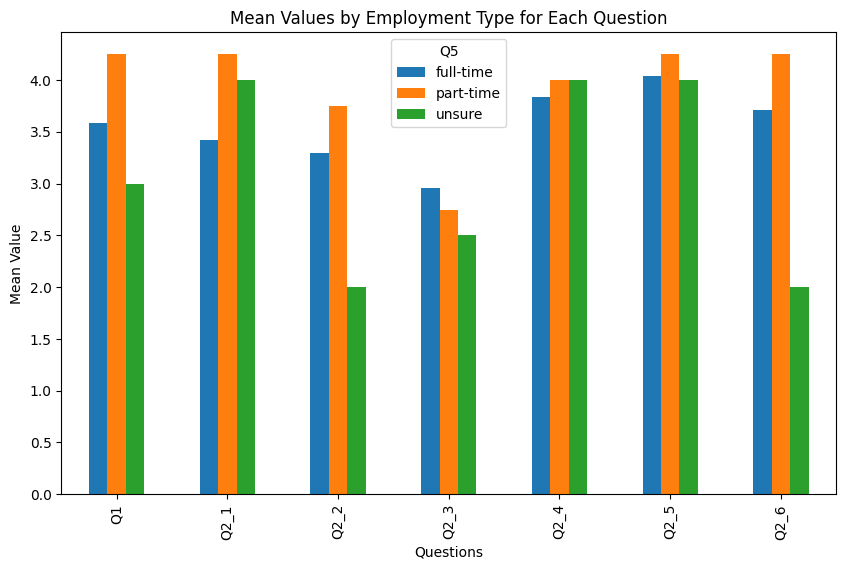

In [22]:
# Bar Chart to visualise the groupby results
employment_type_grouped.T.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Values by Employment Type for Each Question')
plt.xlabel('Questions')
plt.ylabel('Mean Value')
plt.show()

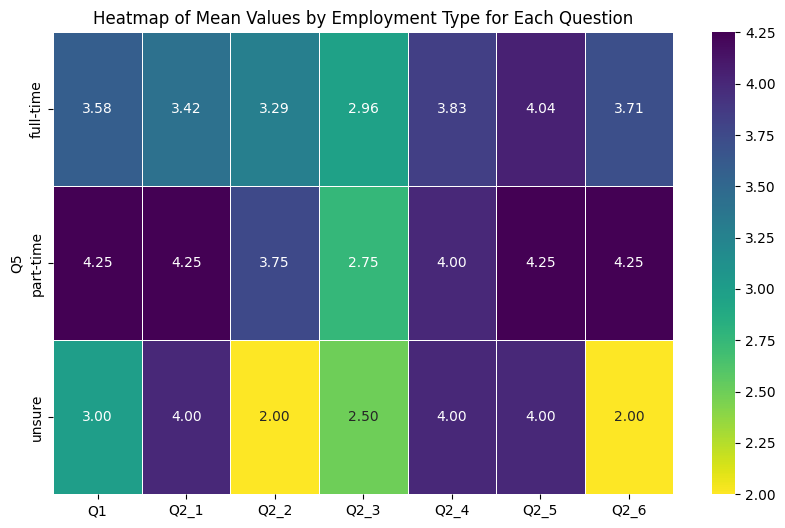

In [23]:
# Heatmap for employment_type_grouped
plt.figure(figsize=(10, 6))

# Explicitly reverse the 'viridis' color map
cmap_reversed = sns.color_palette("viridis", as_cmap=True)
cmap_reversed = cmap_reversed.reversed()

sns.heatmap(employment_type_grouped, cmap=cmap_reversed, annot=True, fmt='.2f', linewidths=.5) #configure the map

plt.title('Heatmap of Mean Values by Employment Type for Each Question') #add title
plt.show()#display the map

**Findings:** Interestingly, although part-time employees, on average, assigned a lower rating to employee treatment at the company compared to their full-time counterparts, they consistently rated the company more favourably than full-time employees across all other organisational aspects. These aspects include overall rating (Q1), communication (Q2_1), policies, systems, and processes (Q2_2), goal clarity (Q2_4), job enrichment (Q2_5), and fair pay (Q2_6).

### Groupby Management and Employment Type

In [24]:
management_employment_grouped = emp_eng_df_copy1.groupby(['Q4','Q5'])[selected_cols].mean()
management_employment_grouped

Q1      Q2_1      Q2_2      Q2_3      Q2_4  \
Q4             Q5                                                            
management     full-time  3.857143  3.571429  3.571429  3.571429  4.142857   
non-management full-time  3.470588  3.352941  3.176471  2.705882  3.705882   
               part-time  4.250000  4.250000  3.750000  2.750000  4.000000   
               unsure     3.000000  4.000000  4.000000  4.000000  4.000000   
unsure         unsure     3.000000  4.000000  0.000000  1.000000  4.000000   

                              Q2_5      Q2_6  
Q4             Q5                             
management     full-time  4.571429  4.142857  
non-management full-time  3.823529  3.529412  
               part-time  4.250000  4.250000  
               unsure     4.000000  2.000000  
unsure         unsure     4.000000  2.000000

In [25]:
management_employment_grouped.index

MultiIndex([(    'management', 'full-time'),
            ('non-management', 'full-time'),
            ('non-management', 'part-time'),
            ('non-management',    'unsure'),
            (        'unsure',    'unsure')],
           names=['Q4', 'Q5'])

In [26]:
# Specify the indices to select
# I want to anylyse these 3 groups: ('management', 'full-time'),('non-management', 'full-time'),('non-management', 'part-time')
indices_to_select = management_employment_grouped.index[0:3]

# Use .loc to select the subset based on the indices
subset_df = management_employment_grouped.loc[indices_to_select]
subset_df

Q1      Q2_1      Q2_2      Q2_3      Q2_4  \
Q4             Q5                                                            
management     full-time  3.857143  3.571429  3.571429  3.571429  4.142857   
non-management full-time  3.470588  3.352941  3.176471  2.705882  3.705882   
               part-time  4.250000  4.250000  3.750000  2.750000  4.000000   

                              Q2_5      Q2_6  
Q4             Q5                             
management     full-time  4.571429  4.142857  
non-management full-time  3.823529  3.529412  
               part-time  4.250000  4.250000

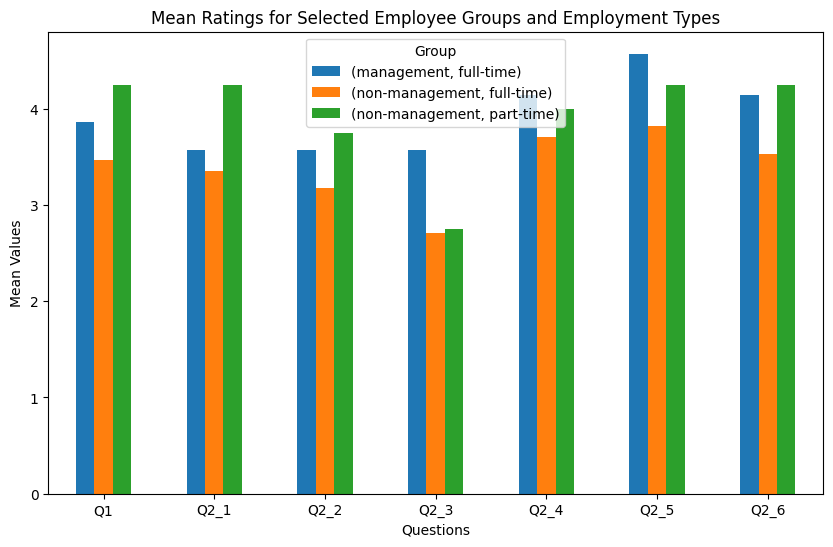

In [27]:
# Use the .T attribute to transpose the DataFrame for better plotting
subset_df_transposed = subset_df.T

# Plot the transposed DataFrame
subset_df_transposed.plot(kind='bar', figsize=(10, 6), rot=0)
plt.title('Mean Ratings for Selected Employee Groups and Employment Types')
plt.xlabel('Questions')
plt.ylabel('Mean Values')
plt.legend(title='Group')
plt.show()

In [28]:
emp_eng_df_copy1.columns

Index(['Q1', 'Q2_1', 'Q2_2', 'Q2_3', 'Q2_4', 'Q2_5', 'Q2_6', 'Q4', 'Q5'], dtype='object')

### Correlation matrix

In [29]:
# Create correlation matrix
columns = ['Q1', 'Q2_1', 'Q2_2', 'Q2_3', 'Q2_4', 'Q2_5', 'Q2_6']
correlation_matrix = emp_eng_df_copy1[columns].corr()

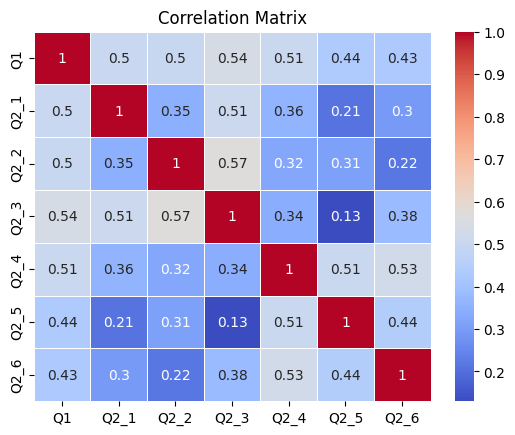


P-Values:
            Q1      Q2_1      Q2_2      Q2_3      Q2_4      Q2_5      Q2_6
Q1         0.0  0.472964  0.508111   0.00202  0.004268  0.031767   0.01889
Q2_1  0.472964       0.0  0.909336  0.757945   0.15362  0.773295  0.656579
Q2_2  0.508111  0.909336       0.0   0.16917  0.788779  0.789892  0.131283
Q2_3   0.00202  0.757945   0.16917       0.0  0.062847  0.898963  0.037753
Q2_4  0.004268   0.15362  0.788779  0.062847       0.0  0.050642  0.002753
Q2_5  0.031767  0.773295  0.789892  0.898963  0.050642       0.0  0.146167
Q2_6   0.01889  0.656579  0.131283  0.037753  0.002753  0.146167       0.0


In [30]:
# Create an empty matrix to store p-values
p_values = pd.DataFrame(index=correlation_matrix.index, columns=correlation_matrix.columns)

# Calculate p-values and fill the matrix
for row in correlation_matrix.index: #loop through the rows in correlation_matrix (outer loop)
    for col in correlation_matrix.columns: #loop through the cols in correlation_matrix (inner loop)
        corr, p_value = pearsonr(emp_eng_df[row], emp_eng_df[col]) #calculates the Pearson correlation coefficient (corr) and 
        #the corresponding p-value (p_value) using the pearsonr function
        p_values.loc[row, col] = p_value #fill the p_value matrix with the current p_value 

# Plotting the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

print("\nP-Values:")
print(p_values)

**Findings:** I was interested in exploring the factors that correlate with the overall rating of Company X. Interesingly, I found that perception of (1) fair treatment (Q2_3), (2) goal clarity (Q2_4), (3) effective policies, systems and processes (Q2_2) and (4) top-down communication (Q2_1) all positively correlate with the overall rating of Company X (Q1). This means that people who rated the company highly on these dimensions would tend to rate the company highly overall. Moreover, all correlations were found to be statistically significant (p>.05) except the correlation between goal clarity (Q2_2) and Q1. 

## Data modelling

In [31]:
# Append column Q3 to our current dataset 
emp_eng_df_copy1['Q3'] = emp_eng_df['Q3']
emp_eng_df_copy1

/var/folders/tz/ngjhtdzj6d71nrpqsl3hy_m00000gn/T/ipykernel_3373/3895659158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emp_eng_df_copy1['Q3'] = emp_eng_df['Q3']


,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q4,Q5,Q3
0,4,2,1,2,5,5,5,non-management,full-time,Resolve internal conflicts. Figure out why peo...
1,4,4,4,4,4,5,4,non-management,full-time,Flexible part-time working arrangements.
2,3,4,1,1,4,4,4,non-management,full-time,Focus on core LG requirements and the staff. F...
3,2,2,4,2,5,5,5,non-management,full-time,Retaining good people. We are losing them fast...
4,5,5,5,5,4,5,5,non-management,part-time,Provide flexibility to employees who need it t...
5,3,4,4,2,4,4,4,management,full-time,Staff Retention Strategies\nMore internal focu...
6,3,2,2,2,2,4,2,management,full-time,Middle management professional development and...
7,4,5,4,4,4,4,4,non-management,full-time,Equalise pay structure/ increases with outside...
8,3,2,2,2,3,2,2,non-management,full-time,"Employment, and fixing IT issues"
9,4,4,4,1,4,4,4,non-management,part-time,"Focus on transparency within the organisation,..."


### Wordcloud for common words visualisation

In [32]:
# text_data

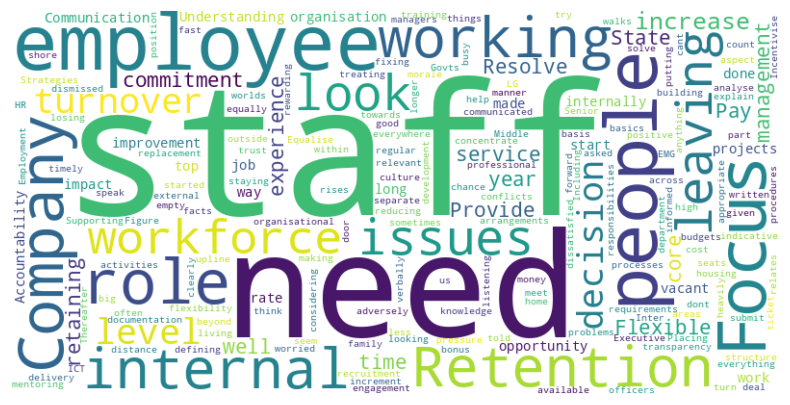

In [33]:
from wordcloud import WordCloud

# Generate a wordcloud to visualise common words
text_data = ' '.join(emp_eng_df_copy1['Q3'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # Turn off axis labels
plt.show() # Display the wordcloud

In [37]:
# Download the NLTK stopwords resource
nltk.download('stopwords')

# Create a set of English stopwords
stop_words = set(stopwords.words('english'))

# Create a function to pre-process out qualitative data (Q3 column)

def preprocess_text(text):
    # Lowercase all text
    text = text.lower()
    
    # Remove words with less than 3 characters
    text = re.sub(r'\b\w{1,2}\b', '', text)  

    # Remove stopwords joins the remaining non-stopwords back into a whole sentence,
    # separated by a space
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply the preprocess_text() function to our Q3 column
processed_text = emp_eng_df_copy1['Q3'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rachelmmm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Set the display option to show the full content of the Series
# pd.set_option('display.max_colwidth', None) 

# Check our processed text
# processed_text

### Tokenize the text into individual words or phrases

In [38]:
from nltk.tokenize import word_tokenize

# Download necessary resource
nltk.download('punkt')

# Tokenize each element in the Series
tokens_series = processed_text.apply(lambda text: word_tokenize(text))

[nltk_data] Downloading package punkt to /Users/rachelmmm/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
tokens_series[3] # This is a list of list

### Frequency distribution of words

In [36]:
# filtered_tokens 

In [39]:
from nltk.probability import FreqDist
from itertools import chain

# Flatten the list of lists
# itertools.chain.from_iterable helps flatten the list of lists
flat_tokens = list(chain.from_iterable(tokens_series)) # contains a mega list of all words

# Exclude periods and commas
filtered_tokens = [token for token in flat_tokens if token not in ['.', ',']]

# Create FreqDist from the flattened list
fdist = FreqDist(filtered_tokens)

# Print the top 10 most common words
print(fdist.most_common(10))

[('staff', 15), ('people', 7), ('focus', 6), ('employees', 5), ('need', 5), ('company', 5), ('internal', 4), ('working', 4), ('retention', 4), ('would', 4)]


### Topic modelling to identify latent topics within the text

In [ ]:
# documents

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Convert processed_text to a list because at the moment, it's a Series
documents = processed_text.tolist()

# Create a CountVectorizer and transform the documents
# CountVectorizer expects a list of strings, where each string represents a document
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

# Fit the Latent Dirichlet Allocation (LDA) model
lda = LatentDirichletAllocation(n_components=5, random_state=42) # n_components=5: we want to retrieve 5 topics
# random_state=42: for reproducibility purposes
lda.fit(X) #train our model

# Get the top words for each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-10-1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")

Topic #1: turnover, employee, company, workforce, management, employees, dismissed, like, upline, high
Topic #2: issues, fixing, employment, communication, flexible, inter, department, employees, resolve, morale
Topic #3: focus, staff, don, decision, get, look, them, people, done, made
Topic #4: staff, internal, retention, working, people, would, needs, company, employees, level
Topic #5: staff, need, roles, understanding, vacant, increases, employees, issues, projects, leaving


### Intepretation 

1. **Topic #1: Workforce Turnover**
   - This topic seems to focus on issues related to workforce turnover, including employee management and challenges.

2. **Topic #2: Workplace Issues**
   - This topic involves discussions about various workplace issues, including communication, flexibility, and morale.

3. **Topic #3: Decision-Making and Focus**
   - This topic suggests discussions related to decision-making, focusing on staff and the need for attention to certain areas.

4. **Topic #4: Staff Retention and Internal Operations**
   - This topic appears to revolve around staff retention, internal operations, and the needs of employees within the company.

5. **Topic #5: Roles, Understanding, and Projects**
   - This topic touches on the importance of understanding roles, addressing issues, managing projects, and considerations for employee well-being.
